In [2]:
%matplotlib inline

import os

import matplotlib.pyplot as plt
from helpers.img_helper import load_image
from helpers.tf_helper import setup_gpu
from autoencoders.AutoEncoderFormat import AutoEncoderFormat, ColoringAutoEncoder


from IPython.display import display, clear_output, Javascript
from  ipywidgets import Button, Dropdown, Text, Layout, VBox, Label
from tkinter import Tk, filedialog

selected_file, selected_file_gray = load_image("kwiat.png")


setup_gpu()
def show_img(img,title=None,cmap=None):
    plt.imshow(img, cmap=cmap)
    if title:
        plt.title(title)
    plt.show()
    

# Coloring auto-encoder

This interactive notebook contains allows user to select an
image and then test selected model on a given image.

In [3]:
file_label = Label()
file_select = Button(description="File Select")

def select_files(b):
    global selected_file
    global selected_file_gray
    global file_label
    global file_select
    file_select.layout.display = "none"
    root = Tk()
    root.withdraw()
    root.call("wm", "attributes", ".", "-topmost", True)
    b.path = filedialog.askopenfilename(filetypes=[("Png", ".png")])
    file_label.value = f"Selected file path: {b.path}"
#     print(f"Selected file path: {b.path}")
    selected_file, selected_file_gray = load_image(b.path)

file_select.on_click(select_files)
#display(file_select)
auto_encoder_name = Text(
    value="AutoEncoder", 
    description="Model name (without format)",
    style= {'description_width': 'initial'}
)
#display(auto_encoder_name)
file_format = Dropdown(
    options=list(AutoEncoderFormat), 
    value=list(AutoEncoderFormat)[0], 
    description="Input file format",
    style={'description_width': 'initial'}
)
#display(file_format)
box = VBox([file_select, file_label, auto_encoder_name, file_format])
display(box)

Click **start** button to test auto encoder on your image.

Button(description='Start', style=ButtonStyle())

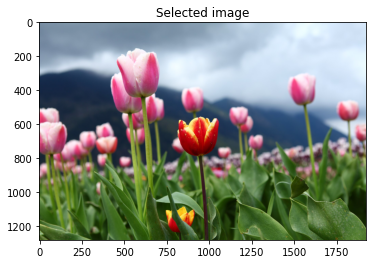

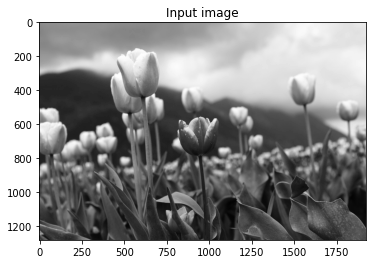

<IPython.core.display.Javascript object>

In [4]:
start_button = Button(description="Start")

def start(b):
    global selected_file
    global selected_file_gray
    show_img(selected_file, title="Selected image")
    show_img(selected_file_gray, title="Input image", cmap="gray")
    display(Javascript("Jupyter.notebook.execute_cells([5,6])"))
    

start_button.on_click(start)
display(start_button)

In [5]:
path = "models"
model_name = f"{auto_encoder_name.value}"
batch_size = 32
auto_encoder = ColoringAutoEncoder(path, model_name, batch_size, file_format.value)

auto_encoder.build()
auto_encoder.load()
y = auto_encoder.predict(selected_file_gray)

Model: "AutoEncoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, None, None, 32)    320       
_________________________________________________________________
batch_normalization (BatchNo (None, None, None, 32)    128       
_________________________________________________________________
re_lu (ReLU)                 (None, None, None, 32)    0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, None, None, 64)    18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, None, None, 64)    256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, None, None, 64)    0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, None, None, 128)   

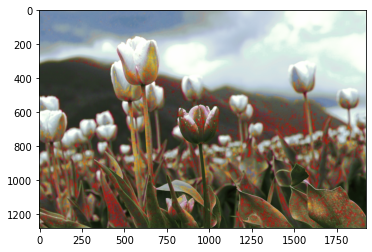

In [6]:
show_img(y)